In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("BankNote_Authentication.csv")

In [2]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.shape

(1372, 5)

In [5]:
df.isnull().sum().sum()

0

In [16]:
df[df.duplicated()].shape

(24, 5)

In [19]:
df.drop_duplicates(keep='first',ignore_index=True,inplace=True)

In [20]:
df.shape

(1348, 5)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1348 non-null   float64
 1   skewness  1348 non-null   float64
 2   curtosis  1348 non-null   float64
 3   entropy   1348 non-null   float64
 4   class     1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 52.8 KB


In [22]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


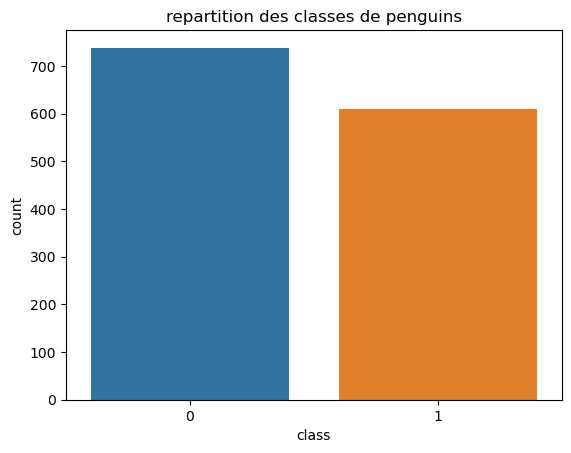

In [23]:
sns.countplot(data=df,x='class')
plt.title("repartition des classes de penguins");

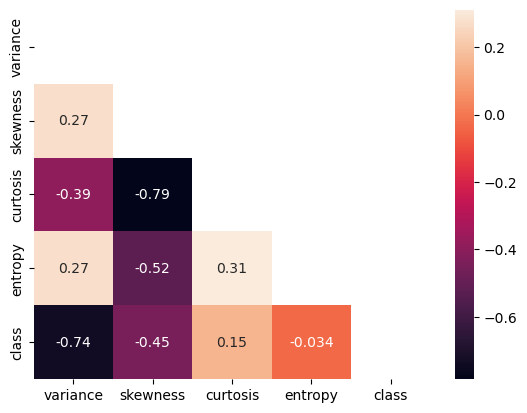

In [25]:
masq=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,mask=masq);

/home/arnel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


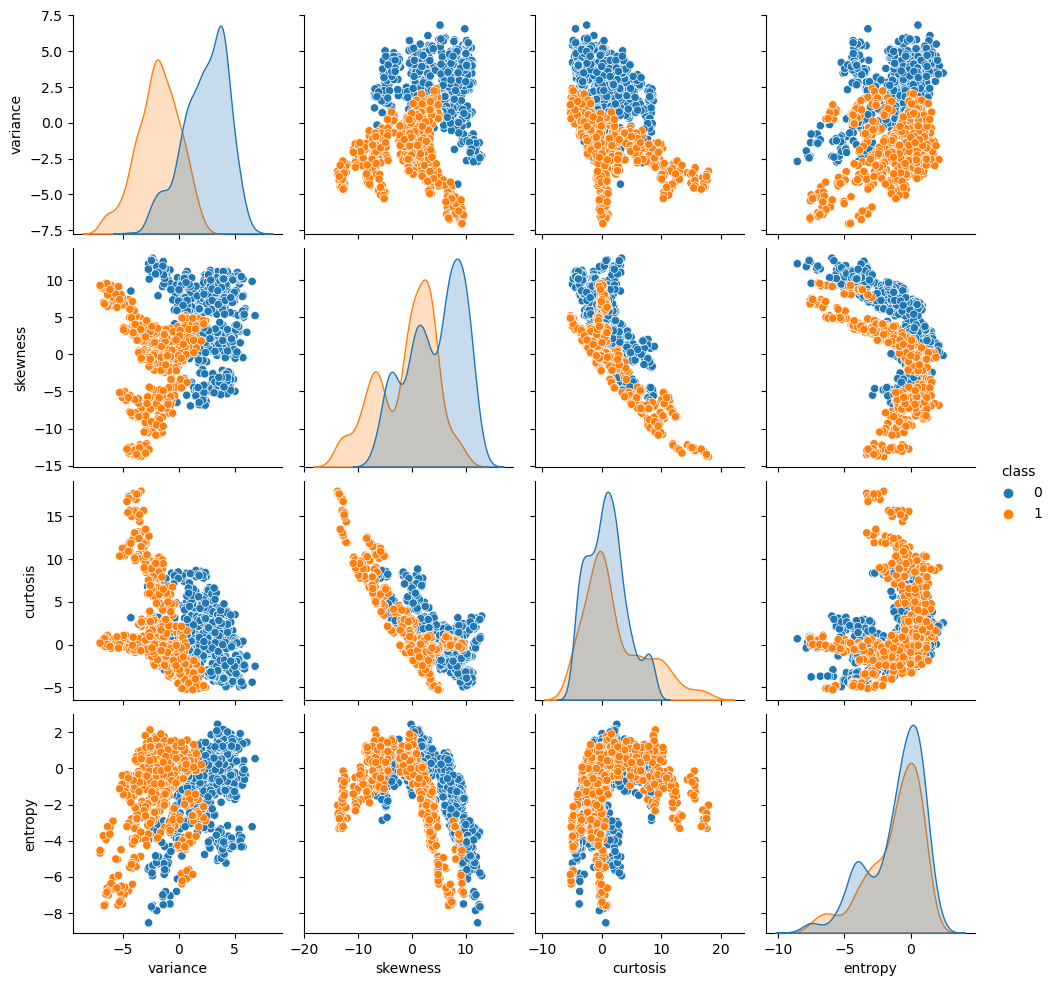

In [36]:
sns.pairplot(data=df,hue='class');

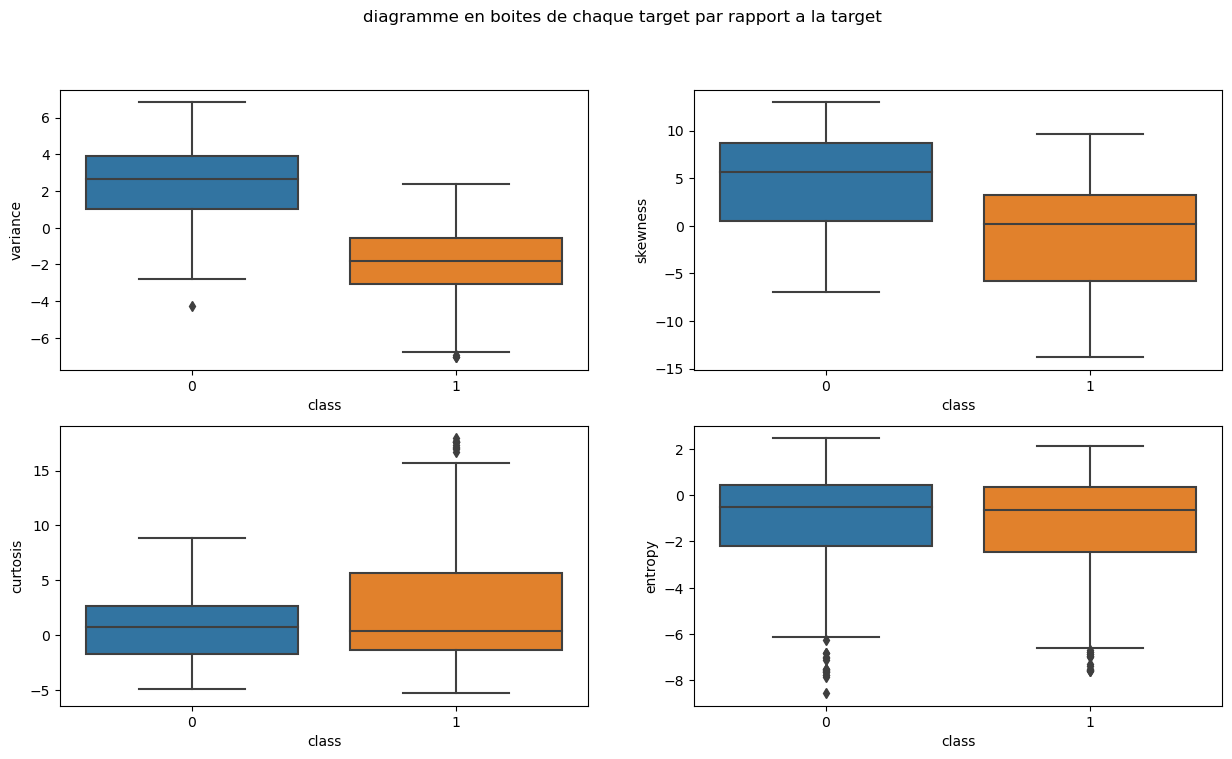

In [35]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
l,c=0,0
for i in df.columns[:-1]:
    sns.boxplot(data=df,y=i,x="class",ax=ax[l,c])
    c+=1
    if c==2:
        l,c=l+1,0
fig.suptitle("diagramme en boites de chaque target par rapport a la target");

In [37]:
X=df.drop('class',axis=1)
y=df['class']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [49]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
model.score(x_train,y_train)

1.0

In [51]:
y_pred=model.predict(x_test)

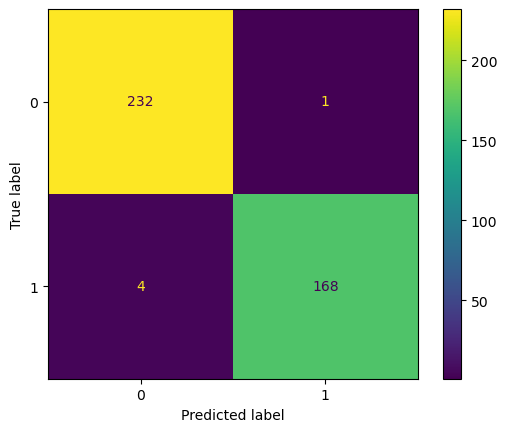

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test);

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       233
           1       0.99      0.98      0.99       172

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405



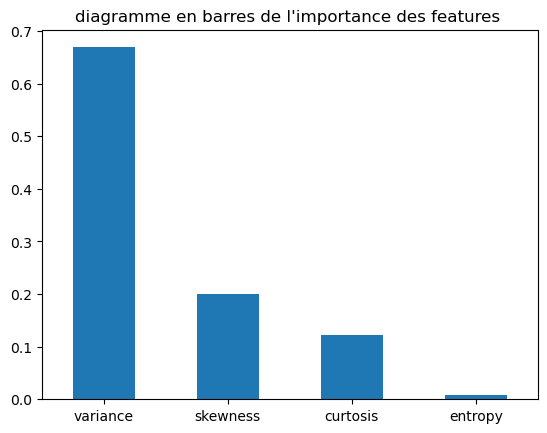

In [67]:
pd.Series(model.feature_importances_,index=df.columns[:-1]).plot.bar()
plt.title("diagramme en barres de l'importance des features ")
plt.xticks(rotation=0);

In [66]:
model.get_depth()

7

In [65]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [72]:
from sklearn.model_selection import learning_curve
n,test_score,val_score=learning_curve(model,x_train,y_train,cv=5,train_sizes=np.linspace(.1,1,10))

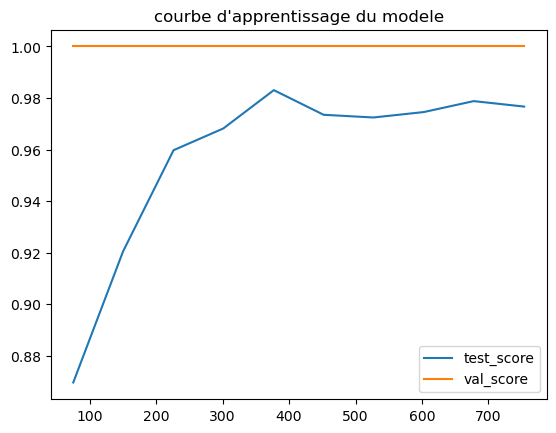

In [75]:
plt.plot(n,val_score.mean(axis=1),label="test_score")
plt.plot(n,test_score.mean(axis=1),label="val_score")
plt.title("courbe d'apprentissage du modele")
plt.legend();

In [84]:
np.linspace(.1,1,10)*x_test.shape[0]

array([ 40.5,  81. , 121.5, 162. , 202.5, 243. , 283.5, 324. , 364.5,
       405. ])

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8),dpi=200)
plot_tree(model,rounded=True,filled=True,feature_names=list(X.columns))
plt.title("notre arbre de decision");